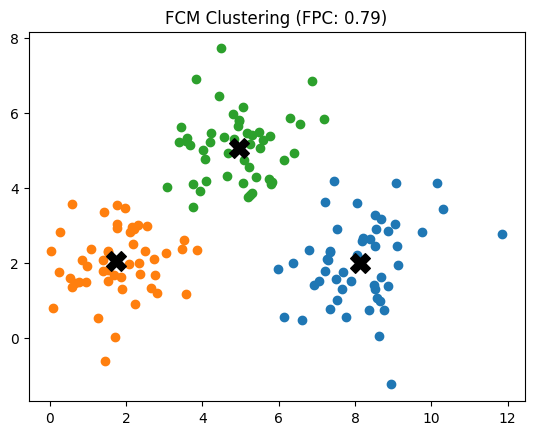

Membership values for 5 points:
 [[0.01884262 0.93721048 0.0439469 ]
 [0.00481386 0.98639639 0.00878975]
 [0.03894681 0.89988241 0.06117077]
 [0.10127612 0.62941634 0.26930754]
 [0.02170015 0.91578181 0.06251804]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.cluster import KMeans

# 1. Generate Synthetic Data (3 clusters) [cite: 10]
np.random.seed(42)
cluster1 = np.random.randn(2, 50) + np.array([[2], [2]])
cluster2 = np.random.randn(2, 50) + np.array([[5], [5]])
cluster3 = np.random.randn(2, 50) + np.array([[8], [2]])
data = np.hstack((cluster1, cluster2, cluster3))

# 2. Apply Fuzzy C-Means [cite: 11]
# cntr: centers, u: membership matrix, fpc: partition coefficient
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=3, m=2, error=0.005, maxiter=1000)

# 3. Visualization [cite: 12]
cluster_membership = np.argmax(u, axis=0)
for j in range(3):
    plt.scatter(data[0, cluster_membership == j], data[1, cluster_membership == j])
plt.scatter(cntr[:, 0], cntr[:, 1], color='black', marker='X', s=200, label='Centers')
plt.title(f"FCM Clustering (FPC: {fpc:.2f})")
plt.show()

# 4. Membership for 5 random points [cite: 13]
print("Membership values for 5 points:\n", u[:, :5].T)

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from scipy.stats import mode
import skfuzzy as fuzz

# -------------------------------------
# 1. Load Iris Dataset from CSV file [cite: 20]
# -------------------------------------
# Ensure you have 'iris_dataset.csv' in the same folder
df = pd.read_csv("iris_dataset.csv")

X = df.drop("species", axis=1).values   # Features 
y = df["species"].values                # Actual Labels [cite: 18]

# -------------------------------------
# 2. Normalize the dataset 
# -------------------------------------
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# -------------------------------------
# 3. Apply Fuzzy C-Means (3 clusters) 
# -------------------------------------
# Note: skfuzzy needs (features, samples), so we transpose X_norm
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_norm.T, c=3, m=2, error=0.005, maxiter=1000
)

# Convert fuzzy memberships to hard labels 
fcm_labels = np.argmax(u, axis=0)

# -------------------------------------
# 4. Predicted clusters for first 20 samples 
# -------------------------------------
print("Predicted clusters (first 20 samples):")
print(fcm_labels[:20])

# -------------------------------------
# 5. Majority Mapping for Fair Accuracy [cite: 24]
# -------------------------------------
mapped_labels = np.zeros_like(y) 

for cluster in range(3):
    mask = (fcm_labels == cluster)
    if np.sum(mask) > 0:
        # Fixed mode calculation to get the single most common label
        m = mode(y[mask], axis=None)
        # Check if result is array or scalar (compatibility fix)
        common_val = m.mode[0] if np.ndim(m.mode) > 0 else m.mode
        mapped_labels[mask] = common_val

fcm_accuracy = accuracy_score(y, mapped_labels)
print("\nFCM Accuracy:", fcm_accuracy)

# -------------------------------------
# 6. Print FPC value 
# -------------------------------------
print("FPC Value:", fpc)
# Explanation: FPC represents how clearly the data is partitioned. 
# Closer to 1.0 means high quality, lower means overlap. 

# -------------------------------------
# 7. K-Means Comparison [cite: 26]
# -------------------------------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_norm)

mapped_km = np.zeros_like(y)

for cluster in range(3):
    mask = (kmeans_labels == cluster)
    if np.sum(mask) > 0:
        m_km = mode(y[mask], axis=None)
        common_val_km = m_km.mode[0] if np.ndim(m_km.mode) > 0 else m_km.mode
        mapped_km[mask] = common_val_km

kmeans_accuracy = accuracy_score(y, mapped_km)
print("K-Means Accuracy:", kmeans_accuracy)

Predicted clusters (first 20 samples):
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

FCM Accuracy: 0.8866666666666667
FPC Value: 0.7424834302463073
K-Means Accuracy: 0.8866666666666667


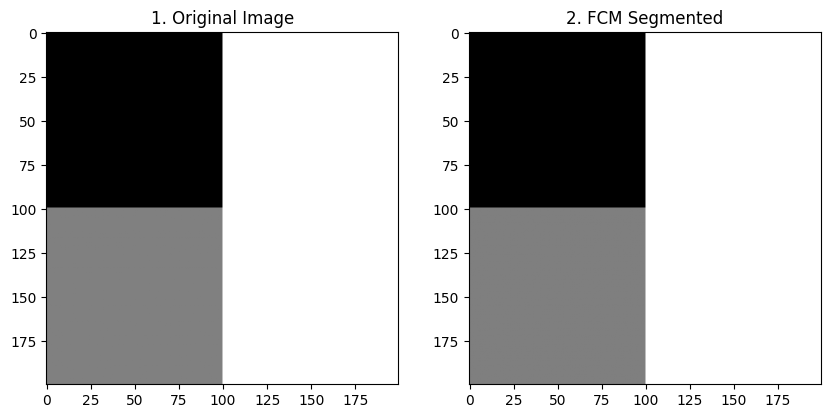

FPC Value: 1.0000


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skfuzzy as fuzz
from sklearn.cluster import KMeans

# 1. Create a Grayscale Image (Dataset generation)
# Hum 200x200 ki image banate hain jis mein 3 distinct shades hain [cite: 32]
img = np.zeros((200, 200), dtype=np.uint8)
img[0:100, 0:100] = 50    # Dark region (Cluster 1)
img[100:200, 0:100] = 150 # Gray region (Cluster 2)
img[0:200, 100:200] = 250 # Bright region (Cluster 3)

# Save and then Load the image [cite: 30]
cv2.imwrite('input_image.png', img)
loaded_img = cv2.imread('input_image.png', cv2.IMREAD_GRAYSCALE)

# 2. Convert to 1D pixel array [cite: 31]
img_flat = loaded_img.reshape((1, -1)).astype(float)

# 3. Apply Fuzzy C-Means (c=3) [cite: 32]
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    img_flat, c=3, m=2, error=0.005, maxiter=1000)

# 4. Reconstruct the segmented image [cite: 33]
u_argmax = np.argmax(u, axis=0)
img_segmented = cntr[u_argmax].reshape(loaded_img.shape).astype(np.uint8)

# Visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(loaded_img, cmap='gray'); plt.title("1. Original Image")
plt.subplot(1, 2, 2); plt.imshow(img_segmented, cmap='gray'); plt.title("2. FCM Segmented")
plt.show()

print(f"FPC Value: {fpc:.4f}")

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import skfuzzy as fuzz

# -------------------------
# 1. Load dataset
# -------------------------
df = pd.read_csv("customer_dataSet.csv")
print("Dataset:\n", df)

X = df[['Age', 'Income', 'SpendingScore']].values  # features

# -------------------------
# 2. Normalize the features
# -------------------------
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# -------------------------
# 3. Apply Fuzzy C-Means (3 clusters)
# -------------------------
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_norm.T, c=3, m=2, error=0.005, maxiter=1000
)

# -------------------------
# 4. Hard cluster assignment
# -------------------------
cluster_labels = np.argmax(u, axis=0)

# -------------------------
# 5. Display results
# -------------------------
print("\nCluster Centers (Age, Income, SpendingScore):")
print(cntr)

print("\nMembership Matrix (first 5 customers):")
print(u[:, :5])

print("\nCluster assignment for each customer:")
for i, cluster in enumerate(cluster_labels):
    print(f"Customer {df.CustomerID[i]} -> Cluster {cluster}")


Dataset:
     CustomerID  Age  Income  SpendingScore
0            1   22   20000             80
1            2   25   30000             60
2            3   30   40000             40
3            4   35   50000             50
4            5   40   60000             30
5            6   45   70000             20
6            7   50   80000             10
7            8   23   25000             75
8            9   28   35000             55
9           10   33   45000             45
10          11   38   55000             35
11          12   43   65000             25
12          13   48   75000             15
13          14   26   32000             70
14          15   31   42000             50

Cluster Centers (Age, Income, SpendingScore):
[[0.38847031 0.42270929 0.50291659]
 [0.08187344 0.12262439 0.86304817]
 [0.8499186  0.85231037 0.12660655]]

Membership Matrix (first 5 customers):
[[0.06451053 0.11359673 0.89039689 0.92695305 0.35071516]
 [0.91866815 0.87066812 0.07802679 0.04071948 0.

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import skfuzzy as fuzz

# -------------------------
# 1. Load dataset
# -------------------------
df = pd.read_csv("covid_pak_neighbors.csv")
print("Dataset:\n", df)

X = df[['TotalCases', 'TotalDeaths', 'Population']].values
countries = df['Country'].values

# -------------------------
# 2. Normalize features
# -------------------------
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
print("\nNormalized Features:\n", X_norm)

# -------------------------
# 3. Apply Fuzzy C-Means (2 clusters)
# -------------------------
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_norm.T, c=2, m=2, error=0.005, maxiter=1000
)

# Hard cluster assignment (max membership)
fcm_labels = np.argmax(u, axis=0)

# -------------------------
# 4. Show membership matrix and cluster centers
# -------------------------
print("\nMembership Matrix (u):\n", u)
print("\nCluster Centers (normalized):\n", cntr)
print("\nFPC Value:", fpc)

# -------------------------
# 5. Show final clusters for each country
# -------------------------
print("\nFCM Cluster Assignment:")
for i, country in enumerate(countries):
    print(f"{country} -> Cluster {fcm_labels[i]}")

# -------------------------
# 6. Interpretation
# -------------------------
print("\nInterpretation:")
for cluster_id in range(2):
    cluster_members = countries[fcm_labels == cluster_id]
    print(f"Cluster {cluster_id}: {list(cluster_members)}")
print("High-impact countries (more cases, deaths, population) are likely in one cluster, low-impact in the other.")

# -------------------------
# 7. Compare with K-Means
# -------------------------
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_norm)

print("\nK-Means Cluster Assignment:")
for i, country in enumerate(countries):
    print(f"{country} -> Cluster {kmeans_labels[i]}")


FileNotFoundError: [Errno 2] No such file or directory: 'covid_pak_neighbors.csv'